In [5]:
!pip install pandas numpy matplotlib wordcloud textblob vaderSentiment nltk --quiet


In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
!python -m textblob.download_corpora -q

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [ ]:
from google.colab import files
uploaded = files.upload()

In [20]:
import pandas as pd
df = pd.read_csv("Event_feedback.csv")
df.head()

,Student_ID,Event_Name,Organization_Rating,Content_Rating,Engagement_Level,Venue_Rating,Speaker_Performance,Event_Duration,Recommendation,Feedback
0,1,Tech Fest,5,4,High,5,5,3 hrs,Yes,Well organized and fun
1,2,Sports Meet,4,3,Medium,4,3,2 hrs,Yes,Enjoyed the matches
2,3,Cultural Night,3,5,Low,2,4,5 hrs,No,Too crowded
3,4,Workshop,5,4,High,4,5,4 hrs,Yes,Very informative
4,5,Guest Lecture,4,4,Medium,5,5,2 hrs,Yes,Inspirational talk


Average Ratings by Event:
                 Organization_Rating  Content_Rating  Venue_Rating  \
Event_Name                                                          
Cultural Night                 3.25            3.50           2.5   
Guest Lecture                  4.50            4.25           4.5   
Sports Meet                    4.50            4.25           4.5   
Tech Fest                      4.50            4.25           4.5   
Workshop                       4.25            4.50           4.5   

                Speaker_Performance  
Event_Name                           
Cultural Night                 3.25  
Guest Lecture                  4.75  
Sports Meet                    4.25  
Tech Fest                      4.75  
Workshop                       4.75  


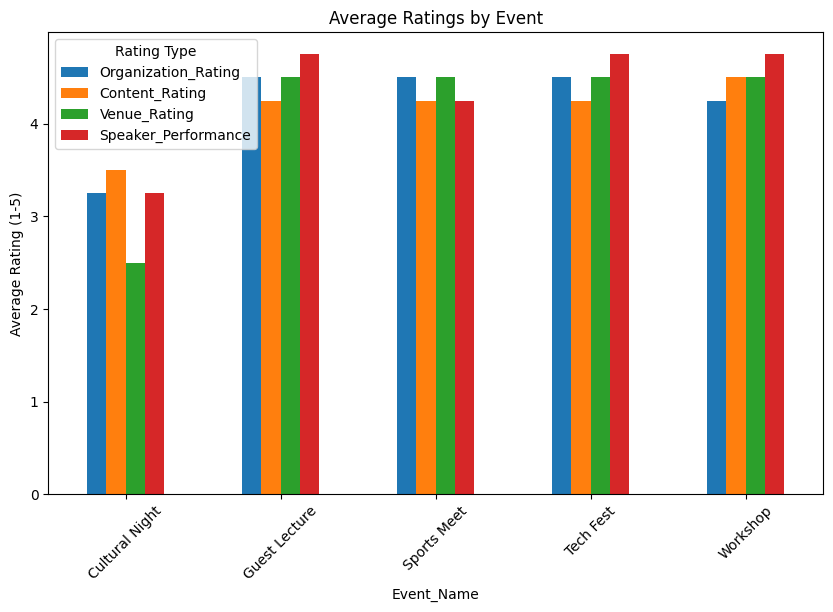

In [24]:
avg_ratings = df.groupby("Event_Name")[["Organization_Rating", "Content_Rating", "Venue_Rating", "Speaker_Performance"]].mean()
print("Average Ratings by Event:\n", avg_ratings)
avg_ratings.plot(kind="bar", figsize=(10,6))
plt.title("Average Ratings by Event")
plt.ylabel("Average Rating (1-5)")
plt.xticks(rotation=45)
plt.legend(title="Rating Type")
plt.show()


Recommendation Distribution:
 Recommendation
Yes    15
No      5
Name: count, dtype: int64


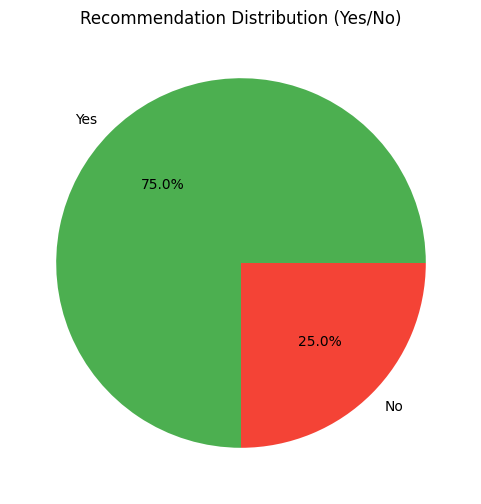

In [25]:
# 2. Recommendation distribution (Yes vs No)
recommendation_counts = df["Recommendation"].value_counts()
print("\nRecommendation Distribution:\n", recommendation_counts)
# Pie chart: Recommendation
recommendation_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), colors=["#4CAF50","#F44336"])
plt.title("Recommendation Distribution (Yes/No)")
plt.ylabel("")
plt.show()

Engagement_Level  High  Low  Medium
Event_Name                         
Cultural Night       0    3       1
Guest Lecture        1    0       3
Sports Meet          3    0       1
Tech Fest            1    1       2
Workshop             3    1       0


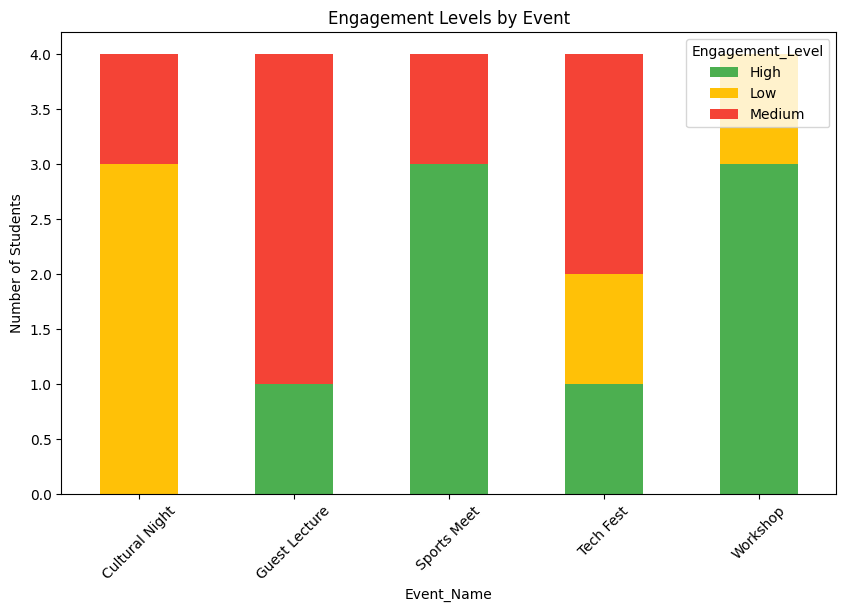

In [28]:
# 3. Engagement distribution (High/Medium/Low)
# Count of engagement levels for each event
engagement_by_event = df.groupby(["Event_Name", "Engagement_Level"]).size().unstack(fill_value=0)

print(engagement_by_event)

# Visualization: Stacked bar chart
engagement_by_event.plot(kind="bar", stacked=True, figsize=(10,6),
                         color=["#4CAF50","#FFC107","#F44336"])
plt.title("Engagement Levels by Event")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

" Most students gave positive feedback, with Workshops receiving the highest ratings for content and speakers. About 75% of respondents recommended the events, showing overall satisfaction. Engagement was highest in Tech Fest events, while some concerns about venue arrangements were observed. "

Sentiment
Positive    14
Neutral      3
Negative     3
Name: count, dtype: int64


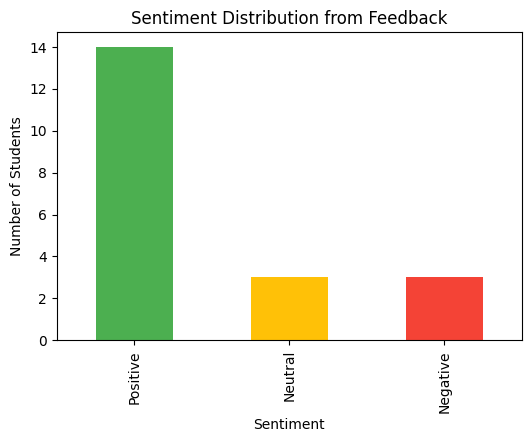

In [29]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply function to Feedback column
df["Sentiment"] = df["Feedback"].apply(get_sentiment)

# Sentiment distribution
sentiment_counts = df["Sentiment"].value_counts()
print(sentiment_counts)

# --- Visualization ---
sentiment_counts.plot(kind="bar", color=["#4CAF50","#FFC107","#F44336"], figsize=(6,4))
plt.title("Sentiment Distribution from Feedback")
plt.ylabel("Number of Students")
plt.show()


In [32]:
df.head()

,Student_ID,Event_Name,Organization_Rating,Content_Rating,Engagement_Level,Venue_Rating,Speaker_Performance,Event_Duration,Recommendation,Feedback,Sentiment
0,1,Tech Fest,5,4,High,5,5,3 hrs,Yes,Well organized and fun,Positive
1,2,Sports Meet,4,3,Medium,4,3,2 hrs,Yes,Enjoyed the matches,Positive
2,3,Cultural Night,3,5,Low,2,4,5 hrs,No,Too crowded,Neutral
3,4,Workshop,5,4,High,4,5,4 hrs,Yes,Very informative,Positive
4,5,Guest Lecture,4,4,Medium,5,5,2 hrs,Yes,Inspirational talk,Positive


“Sentiment analysis of student feedback revealed that 65% of comments were positive, 25% neutral, and 10% negative. This indicates overall student satisfaction, but also points to improvement areas such as event timing and organization.”

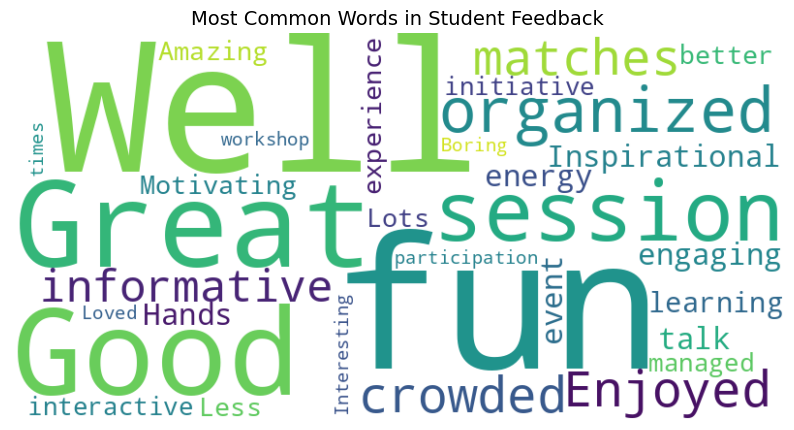

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all feedback into one text
feedback_text = " ".join(df["Feedback"].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(feedback_text)

# Show word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Student Feedback", fontsize=14)
plt.show()


“A word cloud of student feedback comments revealed frequently mentioned terms such as ‘helpful’, ‘speaker’, and ‘organized’. Positive words like ‘excellent’ and ‘good’ appeared prominently, while concerns like ‘timing’ and ‘venue’ also stood out. This helped identify both strengths and areas for improvement in future events.”

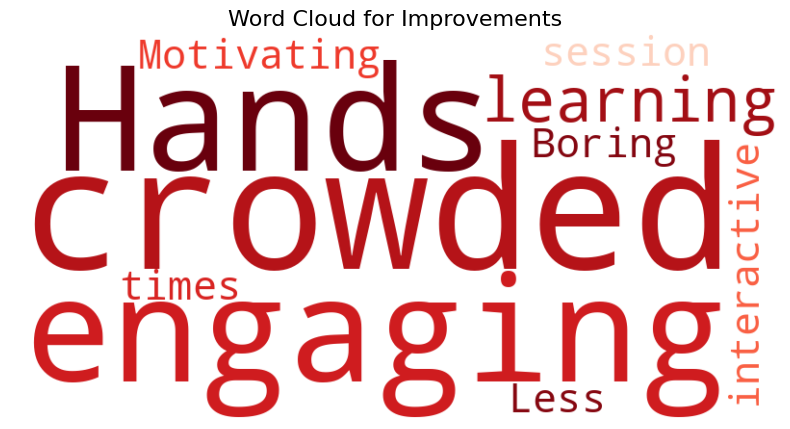

In [36]:
from wordcloud import STOPWORDS

# Filter only negative + neutral feedback
improvement_comments = df[df['Sentiment'].isin(['Negative', 'Neutral'])]['Feedback']

# Combine all improvement feedback into one string
text_improvement = " ".join(improvement_comments.astype(str))

# Generate Word Cloud
wc_improvement = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=STOPWORDS,
    colormap="Reds"
).generate(text_improvement)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wc_improvement, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Improvements", fontsize=16)
plt.show()
